<a href="https://colab.research.google.com/github/renanvilabela/Classifica-o/blob/main/Entrega_final_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("diabetes_prediction_dataset.csv")

print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [13]:
# Descrição das variáveis
descricao_variaveis = {
    'gender': 'Gênero da pessoa (masculino, feminino ou outro)',
    'age': 'Idade da pessoa',
    'hypertension': 'Indicação de se a pessoa tem hipertensão (0: Não, 1: Sim)',
    'heart_disease': 'Indicação de se a pessoa tem doença cardíaca (0: Não, 1: Sim)',
    'smoking_history': 'Histórico de tabagismo da pessoa (ex-fumante, fumante ou nunca fumou)',
    'bmi': 'Índice de Massa Corporal (IMC) da pessoa',
    'HbA1c_level': 'Nível de HbA1c no sangue da pessoa',
    'blood_glucose_level': 'Nível de glicose no sangue da pessoa',
    'diabetes': 'Indicação de se a pessoa tem diabetes (0: Não, 1: Sim)'
}

print("Descrição das variáveis presentes na base de dados:")
for variavel, descricao in descricao_variaveis.items():
    print(variavel + ": " + descricao)

Descrição das variáveis presentes na base de dados:
gender: Gênero da pessoa (masculino, feminino ou outro)
age: Idade da pessoa
hypertension: Indicação de se a pessoa tem hipertensão (0: Não, 1: Sim)
heart_disease: Indicação de se a pessoa tem doença cardíaca (0: Não, 1: Sim)
smoking_history: Histórico de tabagismo da pessoa (ex-fumante, fumante ou nunca fumou)
bmi: Índice de Massa Corporal (IMC) da pessoa
HbA1c_level: Nível de HbA1c no sangue da pessoa
blood_glucose_level: Nível de glicose no sangue da pessoa
diabetes: Indicação de se a pessoa tem diabetes (0: Não, 1: Sim)


In [16]:
# Número de observações e variáveis
num_observacoes = df.shape[0]
num_variaveis = df.shape[1]

print("Número de observações:", num_observacoes)
print("Número de variáveis:", num_variaveis)

#verificando o número de linhas e colunas
print("Número de linhas e colunas:", df.shape)
print()

#verificando os tipos de dados de cada coluna
print("Tipos de dados das colunas:")
print(df.dtypes)
print()

#obtendo estatísicas descritivas para cada coluna numérica
print("Estatísticas descritivas para colunas numéricas:")
print(df.describe())
print()

#verificando se há valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

Número de observações: 100000
Número de variáveis: 9
Número de linhas e colunas: (100000, 9)

Tipos de dados das colunas:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Estatísticas descritivas para colunas numéricas:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.5

In [17]:
# Verificando a distribuição das classes na variável alvo
contagem_classes = df['diabetes'].value_counts()
print("Distribuição das classes na variável alvo:")
print(contagem_classes)

Distribuição das classes na variável alvo:
diabetes
0    91500
1     8500
Name: count, dtype: int64


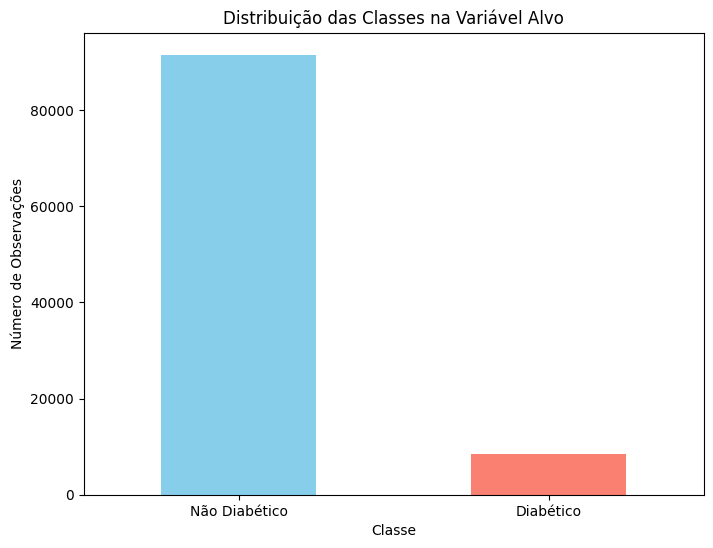

In [18]:
import matplotlib.pyplot as plt

# Visualizando o desbalanceamento das classes
plt.figure(figsize=(8, 6))
contagem_classes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribuição das Classes na Variável Alvo")
plt.xlabel("Classe")
plt.ylabel("Número de Observações")
plt.xticks([0, 1], ['Não Diabético', 'Diabético'], rotation=0)
plt.show()

In [15]:
#importando biblioteca necessária
from sklearn.preprocessing import OneHotEncoder

#criando uma cópia do DataFrame
df_preprocessado = df.copy()

#convertendo variáveis categóricas em variáveis dummy usando one-hot encoding
df_preprocessado = pd.get_dummies(df_preprocessado, columns=['gender','smoking_history'])

#exibindo as primeiras linhas do DataFrame após a conversão
print(df_preprocessado.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0           True        False         False   
1         0           True        False         False   
2         0          False         True         False   
3         0           True        False         False   
4         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False                 False   
1               

In [5]:
# Preenchendo valores ausentes com a média para variáveis numéricas
df_preprocessado['age'].fillna(df_preprocessado['age'].mean(), inplace=True)
df_preprocessado['bmi'].fillna(df_preprocessado['bmi'].mean(), inplace=True)
df_preprocessado['HbA1c_level'].fillna(df_preprocessado['HbA1c_level'].mean(), inplace=True)

# Exibindo se ainda há valores ausentes
print("Valores nulos por coluna após o pré-processamento:")
print(df_preprocessado.isnull().sum())

Valores nulos por coluna após o pré-processamento:
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64


In [6]:
# Importando biblioteca necessária
from sklearn.preprocessing import StandardScaler

# Padronizando as variáveis numéricas
scaler = StandardScaler()
df_preprocessado[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df_preprocessado[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

# Exibindo as primeiras linhas do DataFrame após a padronização
print(df_preprocessado.head())

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.692704             0              1 -0.321056     1.001706   
1  0.538006             0              0 -0.000116     1.001706   
2 -0.616691             0              0 -0.000116     0.161108   
3 -0.261399             0              0 -0.583232    -0.492690   
4  1.515058             1              1 -1.081970    -0.679490   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0             0.047704         0           True        False         False   
1            -1.426210         0           True        False         False   
2             0.489878         0          False         True         False   
3             0.416183         0           True        False         False   
4             0.416183         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False

In [7]:
from sklearn.model_selection import train_test_split

# Separando as features (variáveis independentes) e o target (variável dependente)
X = df_preprocessado.drop('diabetes', axis=1)
y = df_preprocessado['diabetes']

# Dividindo os dados em conjunto de treinamento e teste (por exemplo, 80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exemplo de treinamento de um modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Exemplo de avaliação do modelo de regressão logística
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Outras métricas de avaliação
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.95905
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [12]:
from sklearn.model_selection import cross_val_score

# Exemplo de validação cruzada com 5 folds
scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média da validação cruzada:", scores.mean())

Acurácia média da validação cruzada: 0.9603200000000001


In [10]:
from sklearn.model_selection import GridSearchCV

# Exemplo de pesquisa em grade para ajustar hiperparâmetros
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'C': 0.1}


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Definição dos modelos
modelos = {
    'Regressão Logística': LogisticRegression(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    # Adicione outros modelos conforme necessário
}

# Definição da técnica de balanceamento de classes
balanceamento = 'oversampling'  # ou 'undersampling'

# Listas para armazenar os resultados das métricas de desempenho
acuracia_resultados = []
precisao_resultados = []
recall_resultados = []
f1_resultados = []

# Loop sobre os modelos
for nome_modelo, modelo in modelos.items():
    # Aplicação da técnica de balanceamento de classes
    if balanceamento == 'oversampling':
        sampler = RandomOverSampler()
    elif balanceamento == 'undersampling':
        sampler = RandomUnderSampler()
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Treinamento do modelo
    modelo.fit(X_resampled, y_resampled)

    # Avaliação do modelo
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Adicione os resultados às listas correspondentes
    acuracia_resultados.append(acuracia)
    precisao_resultados.append(precisao)
    recall_resultados.append(recall)
    f1_resultados.append(f1)

    # Impressão dos resultados
    print(f"Modelo: {nome_modelo}")
    print(f"Acurácia: {acuracia}")
    print(f"Precisão: {precisao}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("----------------------------------------")

# Calcule a média e o desvio padrão do desempenho dos modelos
media_acuracia = np.mean(acuracia_resultados)
desvio_padrao_acuracia = np.std(acuracia_resultados)

media_precisao = np.mean(precisao_resultados)
desvio_padrao_precisao = np.std(precisao_resultados)

media_recall = np.mean(recall_resultados)
desvio_padrao_recall = np.std(recall_resultados)

media_f1 = np.mean(f1_resultados)
desvio_padrao_f1 = np.std(f1_resultados)

# Exiba os resultados
print("Média e Desvio Padrão do Desempenho dos Modelos:")
print("Acurácia:")
print(f"Média: {media_acuracia}, Desvio Padrão: {desvio_padrao_acuracia}")
print("Precisão:")
print(f"Média: {media_precisao}, Desvio Padrão: {desvio_padrao_precisao}")
print("Recall:")
print(f"Média: {media_recall}, Desvio Padrão: {desvio_padrao_recall}")
print("F1-score:")
print(f"Média: {media_f1}, Desvio Padrão: {desvio_padrao_f1}")

Modelo: Regressão Logística
Acurácia: 0.8895
Precisão: 0.4286120591581342
Recall: 0.8823185011709602
F1-score: 0.5769525267993875
----------------------------------------
Modelo: Árvore de Decisão
Acurácia: 0.9558
Precisão: 0.7420681551116334
Recall: 0.7394613583138173
F1-score: 0.7407624633431086
----------------------------------------
Média e Desvio Padrão do Desempenho dos Modelos:
Acurácia:
Média: 0.92265, Desvio Padrão: 0.03315000000000001
Precisão:
Média: 0.5853401071348838, Desvio Padrão: 0.15672804797674958
Recall:
Média: 0.8108899297423888, Desvio Padrão: 0.07142857142857145
F1-score:
Média: 0.658857495071248, Desvio Padrão: 0.08190496827186056
